In this project we will build a model which can predict correctly bird species by providing image of a bird.
For Bird species images, kaggle has a dataset which contains 325 bird species images, we will use this dataset for this model

The Dataset available at : "https://www.kaggle.com/gpiosenka/100-bird-species"

I downloaded the dataset and put it on drive. So to use the dataset we need to unzip it

In [ ]:
#unzip the dataset
import zipfile
zip = zipfile.ZipFile("/content/drive/MyDrive/Datasets/archive.zip") #path to the uploaded data
zip.extractall()
zip.close()

In [ ]:
# for mounting the gdrive in collab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing all the necessary libraries

In [ ]:
#importing important libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#there is a csv file in the dataset
birds = pd.read_csv("birds.csv")

In [ ]:
#view first 5 row of bird dataframe
birds.head()

,filepaths,labels,data set
0,train/AFRICAN CROWNED CRANE/001.jpg,AFRICAN CROWNED CRANE,train
1,train/AFRICAN CROWNED CRANE/002.jpg,AFRICAN CROWNED CRANE,train
2,train/AFRICAN CROWNED CRANE/003.jpg,AFRICAN CROWNED CRANE,train
3,train/AFRICAN CROWNED CRANE/004.jpg,AFRICAN CROWNED CRANE,train
4,train/AFRICAN CROWNED CRANE/005.jpg,AFRICAN CROWNED CRANE,train


###### Lets walk through all the folders in dataset and list out how many images are available for each classes of birds

In [ ]:
import os

base_dir = "/content/"
train_dir = os.path.join(base_dir, "train/")
test_dir = os.path.join(base_dir, "test/")
val_dir = os.path.join(base_dir, "valid/")
for dirpath,dirnames,filenames in os.walk(base_dir):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

There are 7 directories and 3 images in '/content/'
There are 2 directories and 6 images in '/content/.config'
There are 1 directories and 0 images in '/content/.config/logs'
There are 0 directories and 6 images in '/content/.config/logs/2021.12.23'
There are 0 directories and 1 images in '/content/.config/configurations'
There are 325 directories and 0 images in '/content/valid'
There are 0 directories and 5 images in '/content/valid/GREAT GRAY OWL'
There are 0 directories and 5 images in '/content/valid/COUCHS KINGBIRD'
There are 0 directories and 5 images in '/content/valid/BLACK SWAN'
There are 0 directories and 5 images in '/content/valid/WHITE TAILED TROPIC'
There are 0 directories and 5 images in '/content/valid/HORNED LARK'
There are 0 directories and 5 images in '/content/valid/STRIPED OWL'
There are 0 directories and 5 images in '/content/valid/AFRICAN CROWNED CRANE'
There are 0 directories and 5 images in '/content/valid/COMMON FIRECREST'
There are 0 directories and 5 images

## Lets visualize some of birds images of different classes

In [ ]:
import matplotlib.image as mpimg
import random

def view_birds(dir,bird_name):
    folder = dir+bird_name
    randomImg = random.sample(os.listdir(folder),1)
    print(randomImg)
    img = mpimg.imread(folder+"/"+randomImg[0])
    plt.imshow(img)
    plt.title(bird_name)
    plt.axis("off")
    print(f"Image shape: {img.shape}")

['056.jpg']
Image shape: (224, 224, 3)


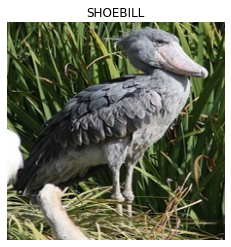

In [ ]:
view_birds(train_dir,"SHOEBILL")

['144.jpg']
Image shape: (224, 224, 3)


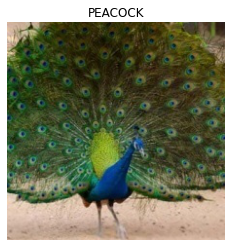

In [ ]:
view_birds(train_dir,"PEACOCK")

['143.jpg']
Image shape: (224, 224, 3)


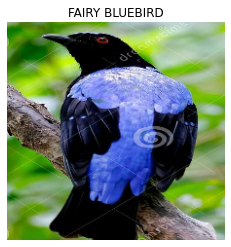

In [ ]:
img = view_birds(train_dir, "FAIRY BLUEBIRD")

Let's create train,test and validation dataset from the images

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255.0) #train data generator
test_datagen = ImageDataGenerator(rescale = 1/255.0) #test data generator
val_datagen = ImageDataGenerator(rescale = 1/255.0) #validation data generator

# i'm not going for augmentation as generally the dataset should work fine without augmentation
train_data = train_datagen.flow_from_directory(train_dir,
                                              target_size = (224,224),
                                               batch_size = 32,
                                              class_mode = "categorical") #creation of train_data
test_data = test_datagen.flow_from_directory(test_dir,
                                            target_size = (224,224),
                                            batch_size= 32,
                                            class_mode = "categorical") # creation of test data
val_data = val_datagen.flow_from_directory(val_dir,
                                          target_size = (224,224),
                                          batch_size = 32,
                                          class_mode = "categorical") # creation of validation data

Found 47332 images belonging to 325 classes.
Found 1625 images belonging to 325 classes.
Found 1625 images belonging to 325 classes.


Now time to create our first model and train our dataset

In [ ]:
#set the random seed
tf.random.set_seed(42)

#create a model
model = tf.keras.models.Sequential([
  tf.keras.layers.InputLayer(input_shape=(224,224,3)),
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
  tf.keras.layers.MaxPool2D((2,2)),
  tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
  tf.keras.layers.MaxPool2D((2,2)),
  tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
  tf.keras.layers.MaxPool2D((2,2)),
  tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'),
  tf.keras.layers.MaxPool2D((2,2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation = 'relu'),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(325, activation = 'sigmoid')
])

#compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
#train the model
history = model.fit(
    train_data,
    steps_per_epoch= len(train_data),
    epochs=30,
    validation_data=val_data,
    validation_steps=len(val_data))

Epoch 1/30
1480/1480 [==============================] - 137s 93ms/step - loss: 5.0443 - accuracy: 0.0527 - val_loss: 4.2044 - val_accuracy: 0.1329
Epoch 2/30
1480/1480 [==============================] - 136s 92ms/step - loss: 4.2305 - accuracy: 0.1397 - val_loss: 3.5460 - val_accuracy: 0.2585
Epoch 3/30
1480/1480 [==============================] - 136s 92ms/step - loss: 3.7591 - accuracy: 0.2069 - val_loss: 3.1945 - val_accuracy: 0.3218
Epoch 4/30
1480/1480 [==============================] - 135s 91ms/step - loss: 3.3693 - accuracy: 0.2629 - val_loss: 2.8158 - val_accuracy: 0.3834
Epoch 5/30
1480/1480 [==============================] - 136s 92ms/step - loss: 2.9975 - accuracy: 0.3246 - val_loss: 2.5530 - val_accuracy: 0.4363
Epoch 6/30
1480/1480 [==============================] - 135s 91ms/step - loss: 2.6833 - accuracy: 0.3796 - val_loss: 2.3747 - val_accuracy: 0.4622
Epoch 7/30
1480/1480 [==============================] - 136s 92ms/step - loss: 2.4080 - accuracy: 0.4239 - val_loss: 2

In [ ]:
model.evaluate(test_data)

51/51 [==============================] - 4s 74ms/step - loss: 3.5667 - accuracy: 0.4892


[3.5667009353637695, 0.48923078179359436]

First model not even reach 50% accuracy, in training set model achieve 82% accuracy but on validation data onlt 48.62%,
which means our model overfitting.
To combat overfitting we adjust few layers in our first model and train again

In [ ]:
# function for ploting training accuracy vs validation accuracy
def plot_loss_acc_curve(history):
  """
  This function plot Training loss against
  Validation loss and Training accuracy against
  Validation accuracy by passing the `history`
  parameter
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  #plot loss
  plt.plot(epochs,loss,label="training loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.legend()
  plt.figure()
  plt.plot(epochs,accuracy,label = 'training accuracy')
  plt.plot(epochs,val_accuracy, label = 'val_aacuracy')
  plt.xlabel("Epochs")
  plt.legend()

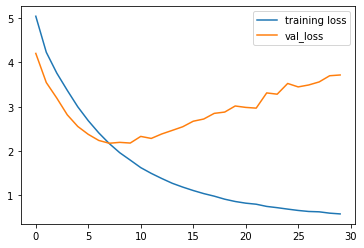

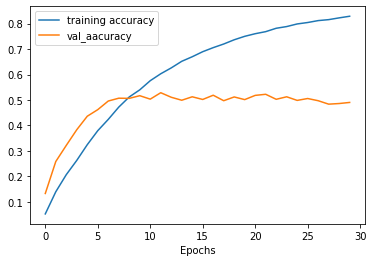

In [ ]:
plot_loss_acc_curve(history=history)

As the above two graph shows, our model not generalize well on unknown data(validation data)
where accuracy keep increasing on training data

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 64)       0

Time to adjust few layers in our first model to combat overfitting.
We create second model slightly tweaking the first model

In [ ]:
#set the random seed
tf.random.set_seed(42)

#create a model
model_2 = tf.keras.models.Sequential([
  tf.keras.layers.InputLayer(input_shape=(224,224,3)),
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
  tf.keras.layers.MaxPool2D((2,2)),
  tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
  tf.keras.layers.MaxPool2D((2,2)),
  tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
  tf.keras.layers.MaxPool2D((2,2)),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation = 'relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(325, activation = 'softmax')
])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',patience=3)

#compile the model
model_2.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
#train the model
history_2 = model_2.fit(train_data,
                        steps_per_epoch = len(train_data),
                        epochs = 100,
                        validation_data = val_data,
                        validation_steps = len(val_data),
                        callbacks = [early_stopping])

Epoch 1/100
1480/1480 [==============================] - 141s 95ms/step - loss: 5.7289 - accuracy: 0.0068 - val_loss: 5.4084 - val_accuracy: 0.0222
Epoch 2/100
1480/1480 [==============================] - 137s 92ms/step - loss: 5.0767 - accuracy: 0.0475 - val_loss: 4.2137 - val_accuracy: 0.1785
Epoch 3/100
1480/1480 [==============================] - 136s 92ms/step - loss: 4.2408 - accuracy: 0.1412 - val_loss: 3.2664 - val_accuracy: 0.3145
Epoch 4/100
1480/1480 [==============================] - 137s 93ms/step - loss: 3.6417 - accuracy: 0.2223 - val_loss: 2.7752 - val_accuracy: 0.4018
Epoch 5/100
1480/1480 [==============================] - 136s 92ms/step - loss: 3.2118 - accuracy: 0.2861 - val_loss: 2.4452 - val_accuracy: 0.4572
Epoch 6/100
1480/1480 [==============================] - 136s 92ms/step - loss: 2.8939 - accuracy: 0.3379 - val_loss: 2.3999 - val_accuracy: 0.4683
Epoch 7/100
1480/1480 [==============================] - 136s 92ms/step - loss: 2.6345 - accuracy: 0.3815 - val_

In [ ]:
model_2.evaluate(test_data)

51/51 [==============================] - 4s 77ms/step - loss: 1.8912 - accuracy: 0.5680


[1.8912097215652466, 0.5680000185966492]

There is improvement, but still our model is not performing well.
This is because we have very little amount of data, and recommending way is atleast 10000 images
per class for deep learning.Having very little data is prone to overfitting.So, our next solution is tweaking a bit more to incrase the accuracy.

But before let's plot training accuracy vs validation accuracy to see how our model performing 

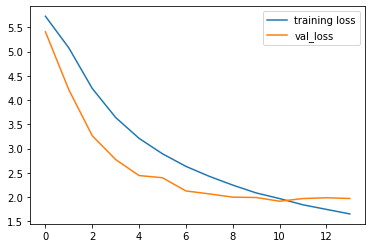

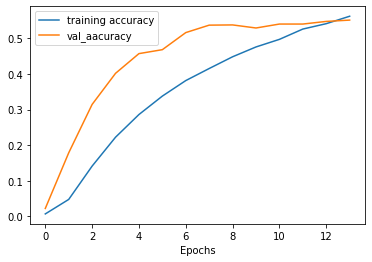

In [ ]:
plot_loss_acc_curve(history=history_2)

Our second model a little better than the first one but it looks like model started to overfit after 11 epochs 

In [ ]:
#set the random seed
tf.random.set_seed(42)

#create a model
model_3 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation= 'relu', input_shape = (224,224,3)),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation = 'relu'),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(325, activation ='sigmoid')
])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5)

#compile the model
model_3.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adamax(),
                metrics = ['accuracy'])

In [ ]:
#train the model_3
history_3 = model_3.fit(train_data,
                        epochs = 100,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data),#passing test_data here and we check accuracy on val_data,they won't harm cause bot set has 5 images each class 
                        callbacks = [early_stopping])

Epoch 1/100
1480/1480 [==============================] - 190s 128ms/step - loss: 5.4033 - accuracy: 0.0369 - val_loss: 4.3085 - val_accuracy: 0.1551
Epoch 2/100
1480/1480 [==============================] - 188s 127ms/step - loss: 4.1205 - accuracy: 0.1701 - val_loss: 2.9745 - val_accuracy: 0.3711
Epoch 3/100
1480/1480 [==============================] - 189s 128ms/step - loss: 3.1730 - accuracy: 0.3137 - val_loss: 2.3240 - val_accuracy: 0.4775
Epoch 4/100
1480/1480 [==============================] - 188s 127ms/step - loss: 2.5057 - accuracy: 0.4314 - val_loss: 1.8355 - val_accuracy: 0.5711
Epoch 5/100
1480/1480 [==============================] - 188s 127ms/step - loss: 1.9870 - accuracy: 0.5280 - val_loss: 1.6356 - val_accuracy: 0.6086
Epoch 6/100
1480/1480 [==============================] - 188s 127ms/step - loss: 1.5803 - accuracy: 0.6101 - val_loss: 1.5985 - val_accuracy: 0.6215
Epoch 7/100
1480/1480 [==============================] - 188s 127ms/step - loss: 1.2333 - accuracy: 0.6822

I used test-data as validation data here mistakenly but there is no problem as both test and validation data has 5 images
per class. So, we evaluate on validation data

In [ ]:
model_3.evaluate(val_data)

51/51 [==============================] - 4s 83ms/step - loss: 1.8376 - accuracy: 0.6271


[1.8375674486160278, 0.6270769238471985]

In [ ]:
model_3.evaluate(test_data)

51/51 [==============================] - 4s 81ms/step - loss: 1.6664 - accuracy: 0.6523


[1.6663663387298584, 0.6523076891899109]

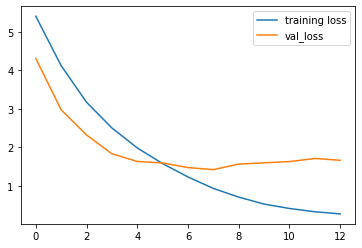

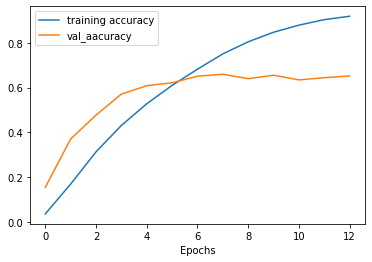

In [ ]:
plot_loss_acc_curve(history_3)

Even though our performance increases but in graph it is clear that our third model is also overfitting.

### **Conclusion:-**

The General Thumb of Rule in Tensorflow is atleast 10,000 images per class to  train a model.As, we have
way less images than 10,000, our other option is `Transfer Learning`. In, the Kaggle page they already suggested
`EfficientnetB3` model for transfer learning to train this dataset but all i wanted to go as close as to baseline 50% score without `Transfer Learning` what we achieved in our 3rd model hitting 65% accuracy.